In [16]:
# import libraries
import pandas as pd
import numpy as np
import time
import itertools
import pickle
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec



In [9]:
# read grid.csv
grid_df = pd.read_csv('./grid.csv',index_col=0)
n_combinations = len(grid_df)
n_combinations


1944

In [10]:
# Read count df
train_ratio=0.7
count_df = pd.read_csv('../Data/HLA_peptide_count.csv',index_col=0)
count_df['train_count'] = (count_df['total']*train_ratio).astype(int)
count_df

,allele,total,positives,negatives,positive_ratio,total_len9,positives_len9,negatives_len9,positive_ratio_len9,train_count
0,HLA-A*02:01,15726,6058.0,9668.0,0.385222,11610.0,4344.0,7266.0,0.374160,11008
1,HLA-A*03:01,7651,2234.0,5417.0,0.291988,5615.0,1407.0,4208.0,0.250579,5355
2,HLA-A*11:01,6660,2318.0,4342.0,0.348048,4697.0,1467.0,3230.0,0.312327,4662
3,HLA-A*02:03,6333,2409.0,3924.0,0.380388,4449.0,1544.0,2905.0,0.347044,4433
4,HLA-A*31:01,5745,1618.0,4127.0,0.281636,3962.0,1022.0,2940.0,0.257951,4021
...,...,...,...,...,...,...,...,...,...,...
126,HLA-C*08:03,3,0.0,3.0,0.000000,0.0,0.0,0.0,0.000000,2
127,HLA-B*27:10,3,0.0,3.0,0.000000,2.0,0.0,2.0,0.000000,2
128,HLA-A*24:01,2,1.0,1.0,0.500000,2.0,1.0,1.0,0.500000,1
129,HLA-B*13:02,1,1.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0


## Performance

In [11]:
#  Read saved data
hyperopts_result_df = pd.read_csv('./hyperopts_result.csv',index_col=0)
hyperopts_result_df

,allele,fit_time,param_complementary_condition,param_induction_measure,param_max_growing,param_minsupp_new,param_pruning_measure,param_voting_measure,test_f1,test_balanced_accuracy,...,mean_conditions_per_rule,std_conditions_per_rule,mean_induced_conditions_per_rule,std_induced_conditions_per_rule,mean_avg_rule_coverage,std_avg_rule_coverage,mean_avg_rule_precision,std_avg_rule_precision,mean_avg_rule_quality,std_avg_rule_quality
0,HLA-A*02:01,"[5.325525522232056, 2.291874647140503, 1.71519...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.7551155115511551, 0.7656946826758148, 0.770...","[0.8066707394582117, 0.8194653575088358, 0.810...",...,2.370418,0.018463,2.523774,0.026916,0.006629,0.000033,0.926393,0.002808,0.427005,0.002755
1,HLA-A*03:01,"[0.35559535026550293, 0.3178553581237793, 0.30...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.6666666666666666, 0.6981677917068467, 0.716...","[0.8250868984450528, 0.7894109452510929, 0.805...",...,2.132631,0.022803,2.239244,0.021774,0.011545,0.000223,0.909127,0.002623,0.405953,0.003390
2,HLA-A*11:01,"[0.248337984085083, 0.2367420196533203, 0.2239...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.7208237986270022, 0.7481203007518796, 0.781...","[0.8319924123495552, 0.8221882692470928, 0.825...",...,2.040398,0.028187,2.166055,0.029934,0.013835,0.000233,0.911065,0.008504,0.409515,0.009441
3,HLA-A*02:03,"[0.22620153427124023, 0.23844218254089355, 0.2...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.7317518248175182, 0.8022598870056498, 0.753...","[0.7960115998492902, 0.8521639257209063, 0.811...",...,2.096526,0.051717,2.225049,0.055664,0.012761,0.000252,0.921894,0.001142,0.425691,0.001876
4,HLA-A*31:01,"[0.19458627700805664, 0.16736769676208496, 0.1...",0,Measures.C2,0,3,Measures.C2,Measures.C2,"[0.6689774696707106, 0.7255369928400954, 0.715...","[0.8292864729534937, 0.8087373373897304, 0.804...",...,1.979585,0.031457,2.087367,0.033745,0.015021,0.000640,0.916707,0.003864,0.417876,0.004093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,HLA-A*02:06,"[0.11106443405151367, 0.08591079711914062, 0.0...",1,Measures.Correlation,5,13,Measures.Correlation,Measures.Correlation,"[0.6314699792960663, 0.6705314009661837, 0.606...","[0.6980837789661318, 0.7188420070495543, 0.688...",...,7.199158,0.107158,9.000000,0.000000,0.522069,0.026906,0.693603,0.010812,0.354481,0.007571
6,HLA-A*68:02,"[0.08439207077026367, 0.09232091903686523, 0.0...",1,Measures.Correlation,5,13,Measures.Correlation,Measures.Correlation,"[0.5027522935779817, 0.47302904564315357, 0.53...","[0.6636872207799054, 0.6743655377982857, 0.701...",...,6.774074,0.170290,9.000000,0.000000,0.491113,0.049100,0.707888,0.012210,0.309541,0.012374
7,HLA-B*07:02,"[0.08244943618774414, 0.0853269100189209, 0.09...",1,Measures.Correlation,5,13,Measures.Correlation,Measures.Correlation,"[0.6210720887245841, 0.5415384615384615, 0.649...","[0.7512118717702474, 0.6850323505624587, 0.743...",...,5.288889,0.408551,9.000000,0.000000,0.497195,0.015192,0.763137,0.012081,0.376924,0.019801
8,HLA-A*01:01,"[0.0820777416229248, 0.08295488357543945, 0.07...",1,Measures.Correlation,5,13,Measures.Correlation,Measures.Correlation,"[0.5333333333333333, 0.5632, 0.532347504621072]","[0.8082412914188615, 0.8068504867022359, 0.811...",...,5.051515,0.359548,9.000000,0.000000,0.490390,0.026879,0.680106,0.013475,0.385790,0.001089


/tmp/ipykernel_40797/728607993.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels([i.get_text()[4:] for i in b.get_xticklabels()], fontsize=fontsize-3, rotation=90)
/tmp/ipykernel_40797/728607993.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-3, rotation=0)
/tmp/ipykernel_40797/728607993.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels([i.get_text()[4:] for i in b.get_xticklabels()], fontsize=fontsize-3, rotation=90)
/tmp/ipykernel_40797/728607993.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels(b.get_yticklabels(), fontsize=fontsi

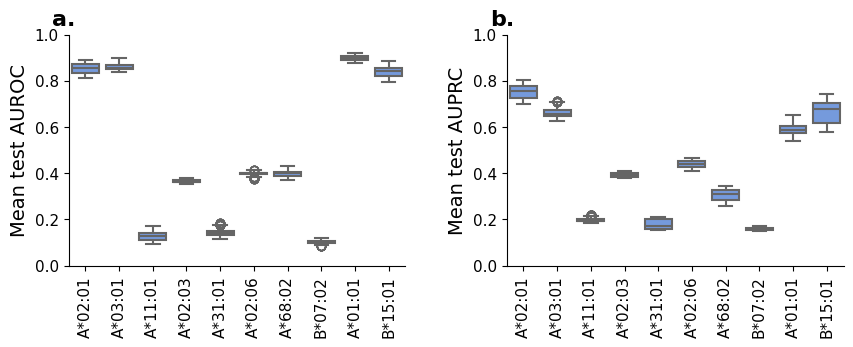

In [15]:
####### plot metrics for each HLA
fontsize=14
dpi = 600
color = 'CornflowerBlue'

fig = plt.figure(figsize=(10,3))
gs = gridspec.GridSpec(1,2, wspace=0.3, width_ratios=[1, 1])  # Adjust the width_ratios as needed

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
# ax3 = plt.subplot(gs[2])


## mean test AUROC
b = sns.boxplot(data=hyperopts_result_df, x='allele', y='mean_test_roc_auc',
                ax=ax1, color=color,saturation = 0.75, linewidth=1.5)

b.set(ylim=(0,1))
plt.draw()
b.set_xlabel('', fontsize=fontsize)
b.set_ylabel('Mean test AUROC', fontsize=fontsize)
b.set_xticklabels([i.get_text()[4:] for i in b.get_xticklabels()], fontsize=fontsize-3, rotation=90)
b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-3, rotation=0)
b.text(-1,1.04,'a.', fontsize=fontsize+2, weight='bold')

## mean test auprc
b = sns.boxplot(data=hyperopts_result_df, x='allele', y='mean_test_auprc',
                ax=ax2, color=color,saturation = 0.75, linewidth=1.5)

b.set(ylim=(0,1))
plt.draw()
b.set_xlabel('', fontsize=fontsize)
b.set_ylabel('Mean test AUPRC', fontsize=fontsize)
b.set_xticklabels([i.get_text()[4:] for i in b.get_xticklabels()], fontsize=fontsize-3, rotation=90)
b.set_yticklabels(b.get_yticklabels(), fontsize=fontsize-3, rotation=0)
b.text(-1,1.04,'b.', fontsize=fontsize+2, weight='bold')

sns.despine(top=True, right=True)


plt.savefig('../figures/hyperopts//allele_metrics.png', dpi=600, bbox_inches="tight")